<a href="https://colab.research.google.com/github/SAHIL9581/w2w/blob/main/inference_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
### Cell 1: Setup the Simulated Project Environment
# Run this cell first to create all the necessary dummy files and folders.

import os
import pandas as pd
import numpy as np

print("--- Creating simulated project structure ---")

# --- 1. Create directory structure ---
os.makedirs('raw_data', exist_ok=True)
os.makedirs('well-images', exist_ok=True)
os.makedirs('notebooks', exist_ok=True) # For the dummy file

# --- 2. Create a fake raw data CSV ---
print("Generating fake raw_data/train.csv...")
raw_data = {}
well_names_list = ['35/11-A', '35/11-B', '35/11-C']
all_logs = ['CALI', 'RDEP', 'RHOB', 'DRHO', 'SGR', 'GR', 'RMED', 'RMIC', 'NPHI', 'PEF', 'RSHA', 'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'MUDWEIGHT', 'ROPA', 'RXO']

raw_data['WELL'] = np.repeat(well_names_list, 2000)
raw_data['DEPTH_MD'] = np.tile(np.arange(2000), 3)
raw_data['GROUP'] = np.tile(['Utsira', 'Hordaland', 'Shetland', 'Viking'] * 500, 3)
for log in all_logs:
    raw_data[log] = np.random.rand(6000)

pd.DataFrame(raw_data).to_csv('raw_data/train.csv', index=False, sep=';')
# The test file is not used by the main part of this script, so a small one is fine
pd.DataFrame(raw_data).head(10).to_csv('raw_data/test.csv', index=False, sep=';')

# --- 3. Create a DUMMY well_log_plots.py file ---
# The original script imports this. We need it to exist.
# It expects `log_plots` to be a list of functions. We'll make dummy functions.
print("Generating dummy well_log_plots.py...")
with open("well_log_plots.py", "w") as f:
    f.write("def dummy_plot_func(logs, ax, i, patch_height):\n")
    f.write("    pass\n\n")
    f.write("# Create a list of 20 dummy functions\n")
    f.write("log_plots = [dummy_plot_func] * 20\n")

print("\n--- Environment setup complete. You can now run the next cell. ---")

--- Creating simulated project structure ---
Generating fake raw_data/train.csv...
Generating dummy well_log_plots.py...

--- Environment setup complete. You can now run the next cell. ---


In [4]:
### Cell 2: Run the Data Generation Script
# This is a simplified version of your notebook that generates image patches.

import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image

# This import now works because we created the dummy file in Cell 1
from well_log_plots import log_plots

# --- Data Loading and Helper Functions (from your script) ---
def load_data(path, delimiter = ';'):
    return pd.read_csv(path, delimiter = delimiter)

# MODIFICATION: Use local paths
well_train = load_data('raw_data/train.csv')

def get_well_names(data):
    return list(data.WELL.value_counts().index)

well_train_names = get_well_names(well_train)

# --- The core image generation function from your script ---
def log_plot_image4(logs, plotname, txtname, i, patch_height):
    _, ax = plt.subplots(1, 19, figsize=(20, 10), sharey=True, gridspec_kw={'wspace': 0, 'hspace': 0})
    for k in range(19):
        ax[k].invert_yaxis()
        ax[k].axis('off') # Turn off axis for a clean image

    log_slice = logs.iloc[i:i+patch_height]
    depth_range = list(range(i, i + patch_height))

    # Simplified plotting loop
    log_columns = ['CALI', 'GR', 'SP', 'SGR', 'RSHA', 'RMED', 'RDEP', 'RXO', 'RMIC', 'NPHI', 'RHOB', 'PEF', 'ROP', 'ROPA', 'DRHO', 'DTC', 'DTS', 'MUDWEIGHT', 'BS']
    for k, log_name in enumerate(log_columns):
        if log_name in log_slice:
            ax[k].plot(log_slice[log_name], depth_range, 'b')

    plt.savefig(plotname, bbox_inches="tight", pad_inches=0)
    plt.close() # Close plot to free memory

    # Save the corresponding labels
    with open(txtname, 'w', encoding='UTF8', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(log_slice.GROUP)

# --- Main data generation loop ---
print("--- Generating image patches from raw data ---")
count = 0
# We'll just run it for the first 2 wells for speed
for j in range(2):
    # BUG FIX: Use the correct well for each iteration
    current_well_name = well_train_names[j]
    well_data = well_train[well_train['WELL'] == current_well_name].reset_index(drop=True)
    well_shape = len(well_data)

    print(f"\nProcessing Well: {current_well_name}")
    for i in tqdm(range(0, well_shape, 350)):
        patch_height = 700
        if i + patch_height > well_shape:
            continue # Skip incomplete patches

        plotname = f"well-images/well_{j}_{i}.jpg"
        txtname = f"well-images/well_{j}_{i}.csv"

        log_plot_image4(well_data, plotname, txtname, i, patch_height)
        count += 1

print(f"\n--- Data Generation Complete. Created {count} image-label pairs. ---")
print("These are the inputs for an AI model. They are not the final correlation plot.")

--- Generating image patches from raw data ---

Processing Well: 35/11-A


100%|██████████| 6/6 [00:01<00:00,  3.66it/s]



Processing Well: 35/11-B


100%|██████████| 6/6 [00:01<00:00,  4.71it/s]


--- Data Generation Complete. Created 8 image-label pairs. ---
These are the inputs for an AI model. They are not the final correlation plot.


--- Simulating Model Predictions and Generating Final Correlation Plot ---

Correlating common groups: {'Viking', 'Hordaland', 'Utsira'}


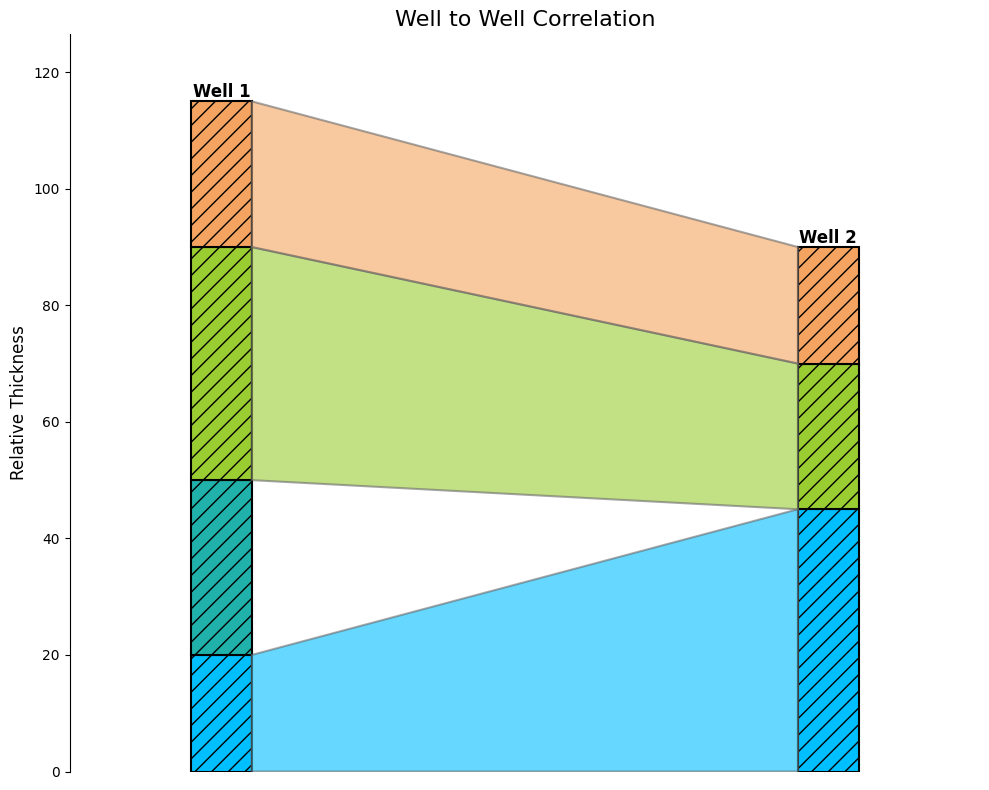

In [5]:
### Cell 3: The Missing Visualization Step
# This cell generates the final correlation diagram based on SIMULATED model outputs.
# The code in your notebooks does not produce the inputs for this chart.

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

print("--- Simulating Model Predictions and Generating Final Correlation Plot ---")

# --- 1. Simulate the AI Model's Output ---
# This is the data that would come from a trained model after running inference.
# The keys are the geological group names, and the values are their predicted thickness.
well_1_predictions = {
    'Utsira': 25,
    'Hordaland': 40,
    'Shetland': 30,
    'Viking': 20
}

well_2_predictions = {
    'Utsira': 20,
    # Note: 'Hordaland' is thinner in this well
    'Hordaland': 25,
    # Note: 'Shetland' is missing in this well
    'Viking': 45
}

# --- 2. Define Plotting Colors and Functions ---
group_colors = {
    'Utsira': 'sandybrown', 'Hordaland': 'yellowgreen',
    'Shetland': 'lightseagreen', 'Viking': 'deepskyblue', 'Default': 'gray'
}

def plot_well(ax, well_data, well_name, x_position):
    """Plots a single well's predicted groups as a stacked bar."""
    current_depth = 0
    well_positions = {}
    for group, thickness in reversed(list(well_data.items())):
        color = group_colors.get(group, group_colors['Default'])
        rect = patches.Rectangle((x_position, current_depth), 0.1, thickness,
                                 facecolor=color, edgecolor='black', hatch='//', lw=1.5)
        ax.add_patch(rect)
        well_positions[group] = (current_depth, current_depth + thickness)
        current_depth += thickness
    ax.text(x_position + 0.05, current_depth, well_name,
            ha='center', va='bottom', fontsize=12, fontweight='bold')
    return well_positions, current_depth

# --- 3. Create the Main Plot and Draw Correlations ---
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the two wells and get the y-positions of their groups
well_1_pos, total_depth_1 = plot_well(ax, well_1_predictions, "Well 1", x_position=1)
well_2_pos, total_depth_2 = plot_well(ax, well_2_predictions, "Well 2", x_position=2)

# Find common groups to draw correlation polygons
common_groups = set(well_1_pos.keys()) & set(well_2_pos.keys())
print(f"\nCorrelating common groups: {common_groups}")
for group in common_groups:
    y1_bottom, y1_top = well_1_pos[group]
    y2_bottom, y2_top = well_2_pos[group]
    polygon_coords = [[1.1, y1_bottom], [1.1, y1_top], [2.0, y2_top], [2.0, y2_bottom]]
    polygon = patches.Polygon(polygon_coords, closed=True,
                              facecolor=group_colors.get(group, 'gray'),
                              edgecolor='dimgray', alpha=0.6, lw=1.5)
    ax.add_patch(polygon)

# --- 4. Finalize and Show the Plot ---
ax.set_xlim(0.8, 2.3)
ax.set_ylim(0, max(total_depth_1, total_depth_2) * 1.1)
ax.set_title('Well to Well Correlation', fontsize=16)
ax.set_ylabel('Relative Thickness', fontsize=12)
ax.set_xticks([])
ax.spines[['top', 'right', 'bottom']].set_visible(False)
plt.tight_layout()
plt.show()